In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [18]:
df=pd.read_csv('Employee.csv')
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [19]:
# data preprocessing
df.select_dtypes(include='object').nunique()

Education      3
City           3
Gender         2
EverBenched    2
dtype: int64

In [20]:
#change the data type to string
df['LeaveOrNot'] = df['LeaveOrNot'].astype(str)
#change 1 to yes and 0 to no for visualization
df['LeaveOrNot'] = df['LeaveOrNot'].map({'1': 'yes', '0': 'no'})

In [21]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,no
1,Bachelors,2013,Pune,1,28,Female,No,3,yes
2,Bachelors,2014,New Delhi,3,38,Female,No,2,no
3,Masters,2016,Bangalore,3,27,Male,No,5,yes
4,Masters,2017,Pune,3,24,Male,Yes,2,yes


In [22]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                   object
dtype: object

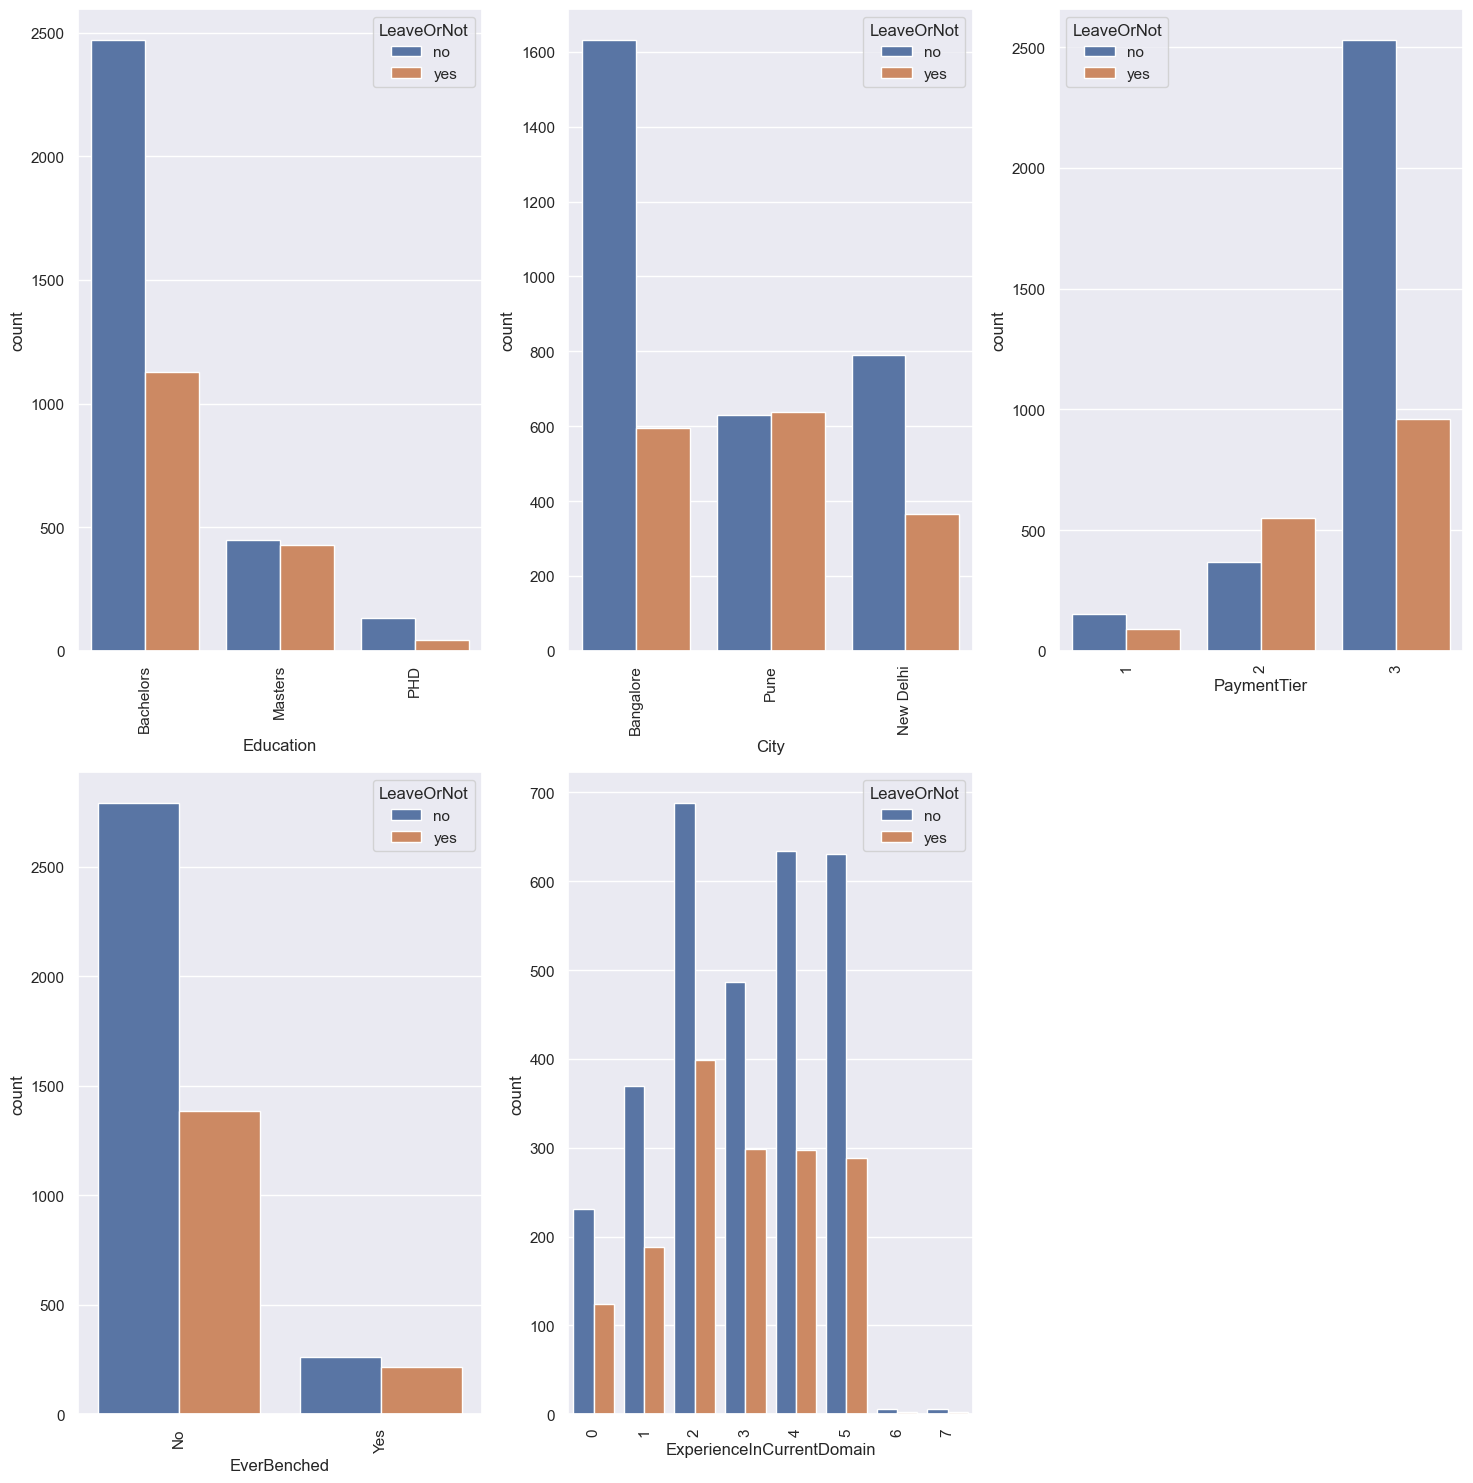

In [23]:
# Expolatory data analysis
#list of categorial variables to plot
cat_vars = ['Education', 'City', 'PaymentTier', 'EverBenched', 'ExperienceInCurrentDomain']

#create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='LeaveOrNot', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
#adjust spacing between subplots
fig.tight_layout()

#remove the sixth subplot
fig.delaxes(axs[5])

#show plot
plt.show()

<Axes: xlabel='JoiningYear', ylabel='count'>

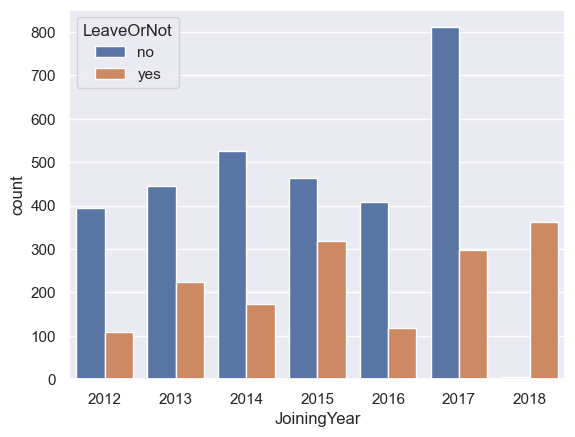

In [24]:
sns.countplot(x='JoiningYear', hue='LeaveOrNot', data=df)

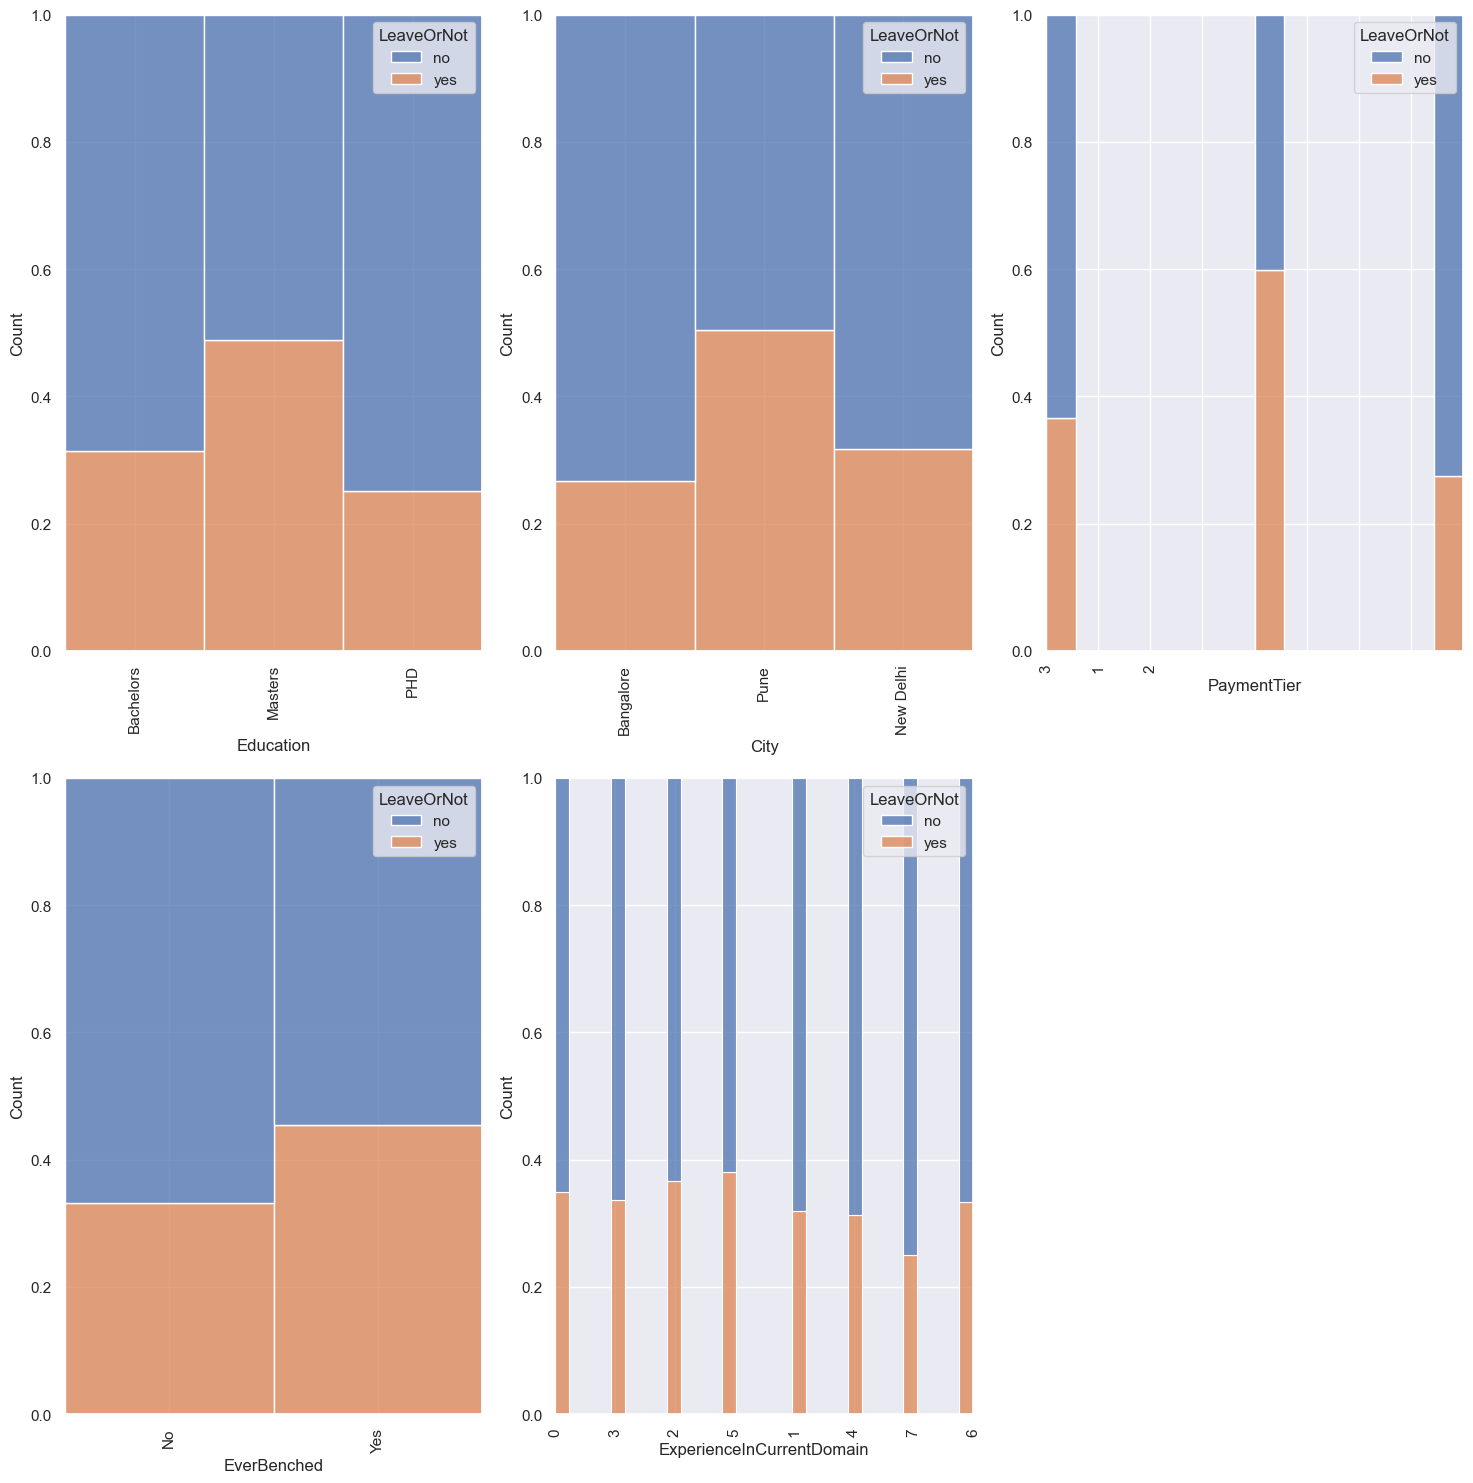

In [25]:
import warnings
warnings.filterwarnings("ignore")
#get list of categorical varibles
cat_vars = ['Education', 'City', 'PaymentTier', 'EverBenched', 'ExperienceInCurrentDomain']

#create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

#create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='LeaveOrNot', data=df, ax=axs[i], multiple='fill')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

#adjust spacing between subplots
fig.tight_layout()

#remove the sixth subplot
fig.delaxes(axs[5])

#show plot
plt.show()

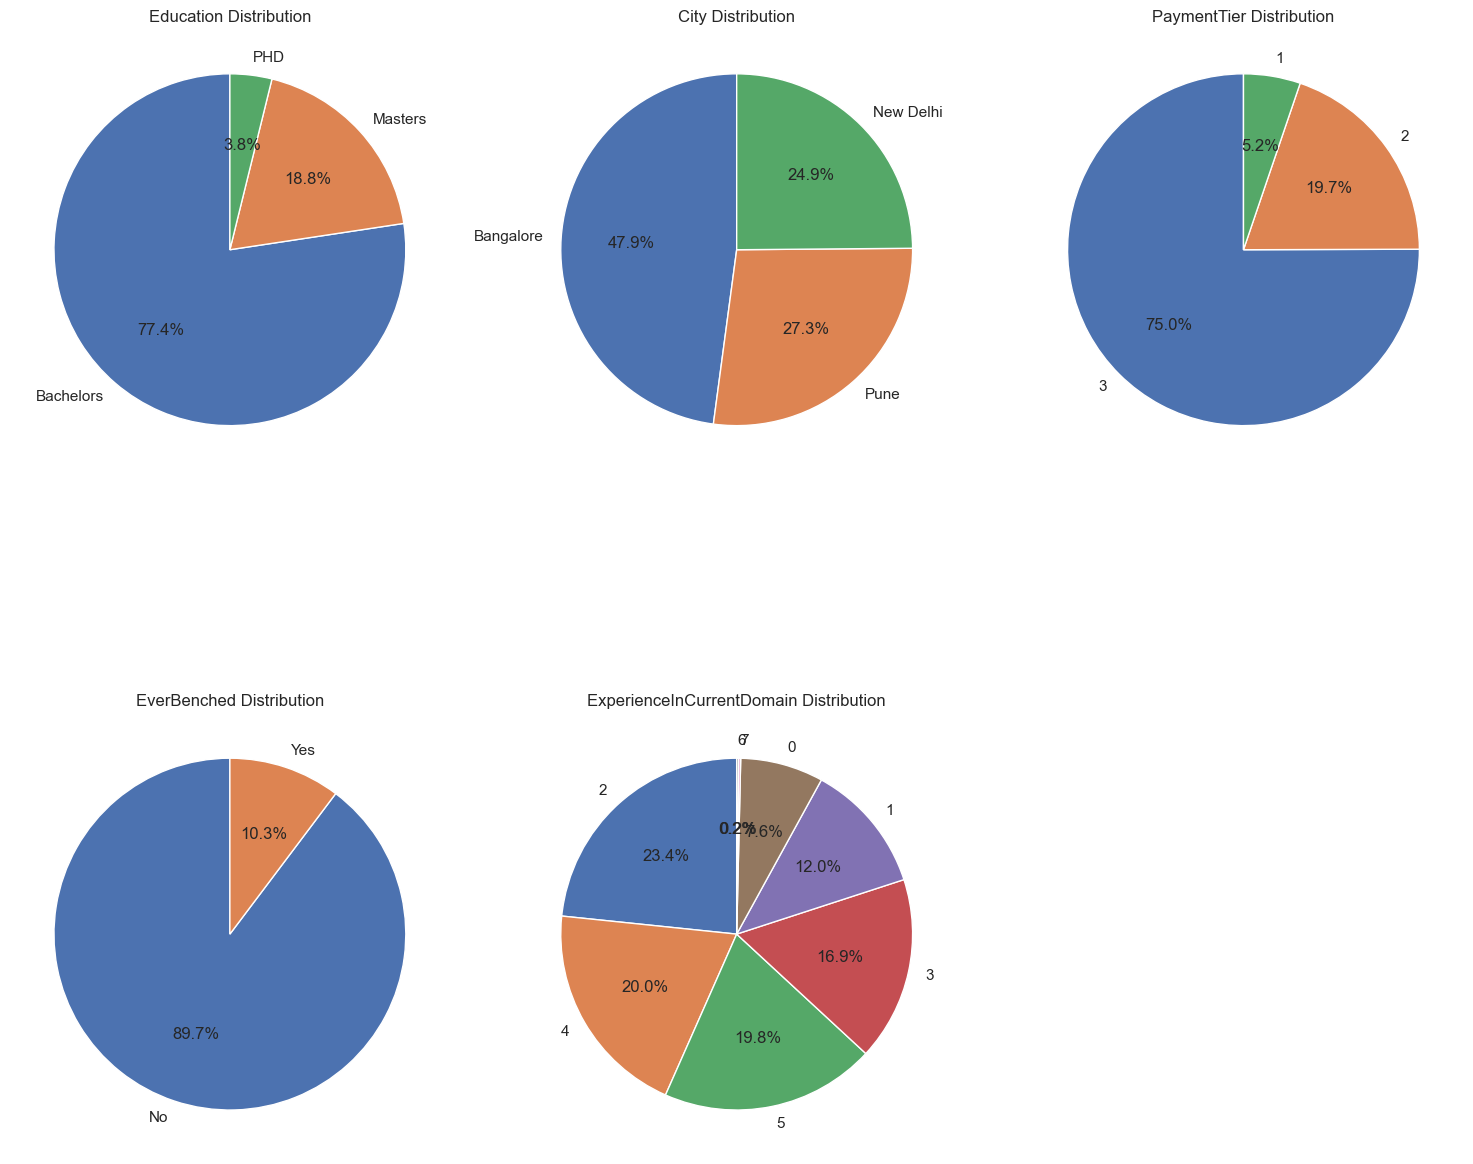

In [26]:
cat_vars = ['Education', 'City', 'PaymentTier', 'EverBenched', 'ExperienceInCurrentDomain']

#create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

#create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        #count the number of occurences for each category
        cat_counts = df[var].value_counts()
        
        #create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle = 90)
        
        #set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')
                              
#adjust spacing between subplots
fig.tight_layout()
fig.delaxes(axs[1][2])
#show the plot
plt.show()

<Axes: xlabel='Age'>

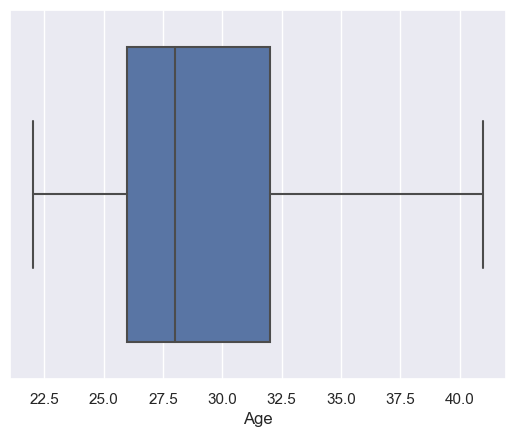

In [27]:
sns.boxplot(x='Age', data=df)

<Axes: xlabel='Age', ylabel='LeaveOrNot'>

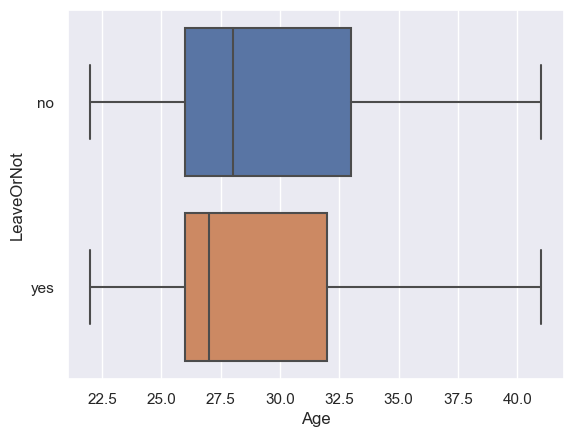

In [28]:
sns.boxplot(x='Age', data=df, y='LeaveOrNot')

<Axes: xlabel='Age'>

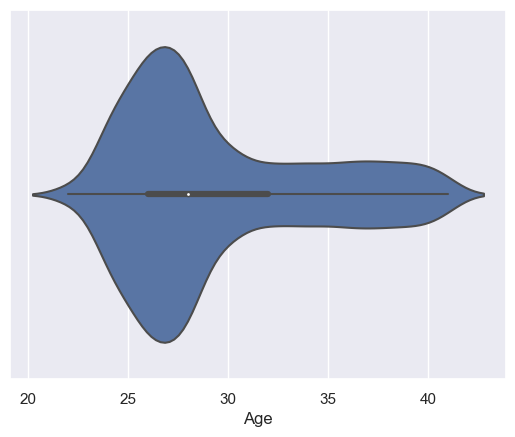

In [29]:
sns.violinplot(x='Age', data=df)

<Axes: xlabel='Age', ylabel='LeaveOrNot'>

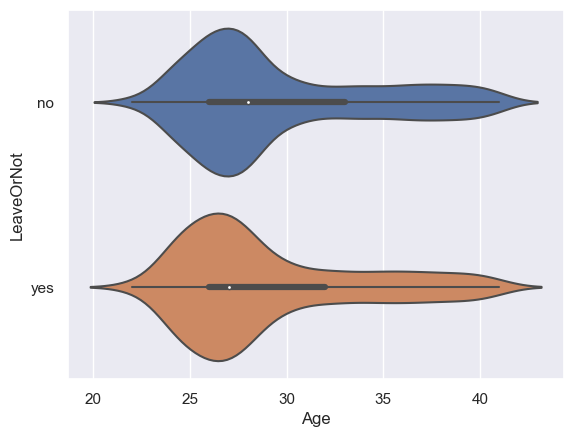

In [30]:
sns.violinplot(x='Age', data=df, y='LeaveOrNot')

In [31]:
#Data preprocessing Part 2

#check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [32]:
#Label encoding for object datatypes

#loop over each column in the dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Education: ['Bachelors' 'Masters' 'PHD']
City: ['Bangalore' 'Pune' 'New Delhi']
Gender: ['Male' 'Female']
EverBenched: ['No' 'Yes']
LeaveOrNot: ['no' 'yes']


In [33]:
from sklearn import preprocessing

#loop over each column in the dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

Education: [0 1 2]
City: [0 2 1]
Gender: [1 0]
EverBenched: [0 1]
LeaveOrNot: [0 1]


In [34]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


<Axes: >

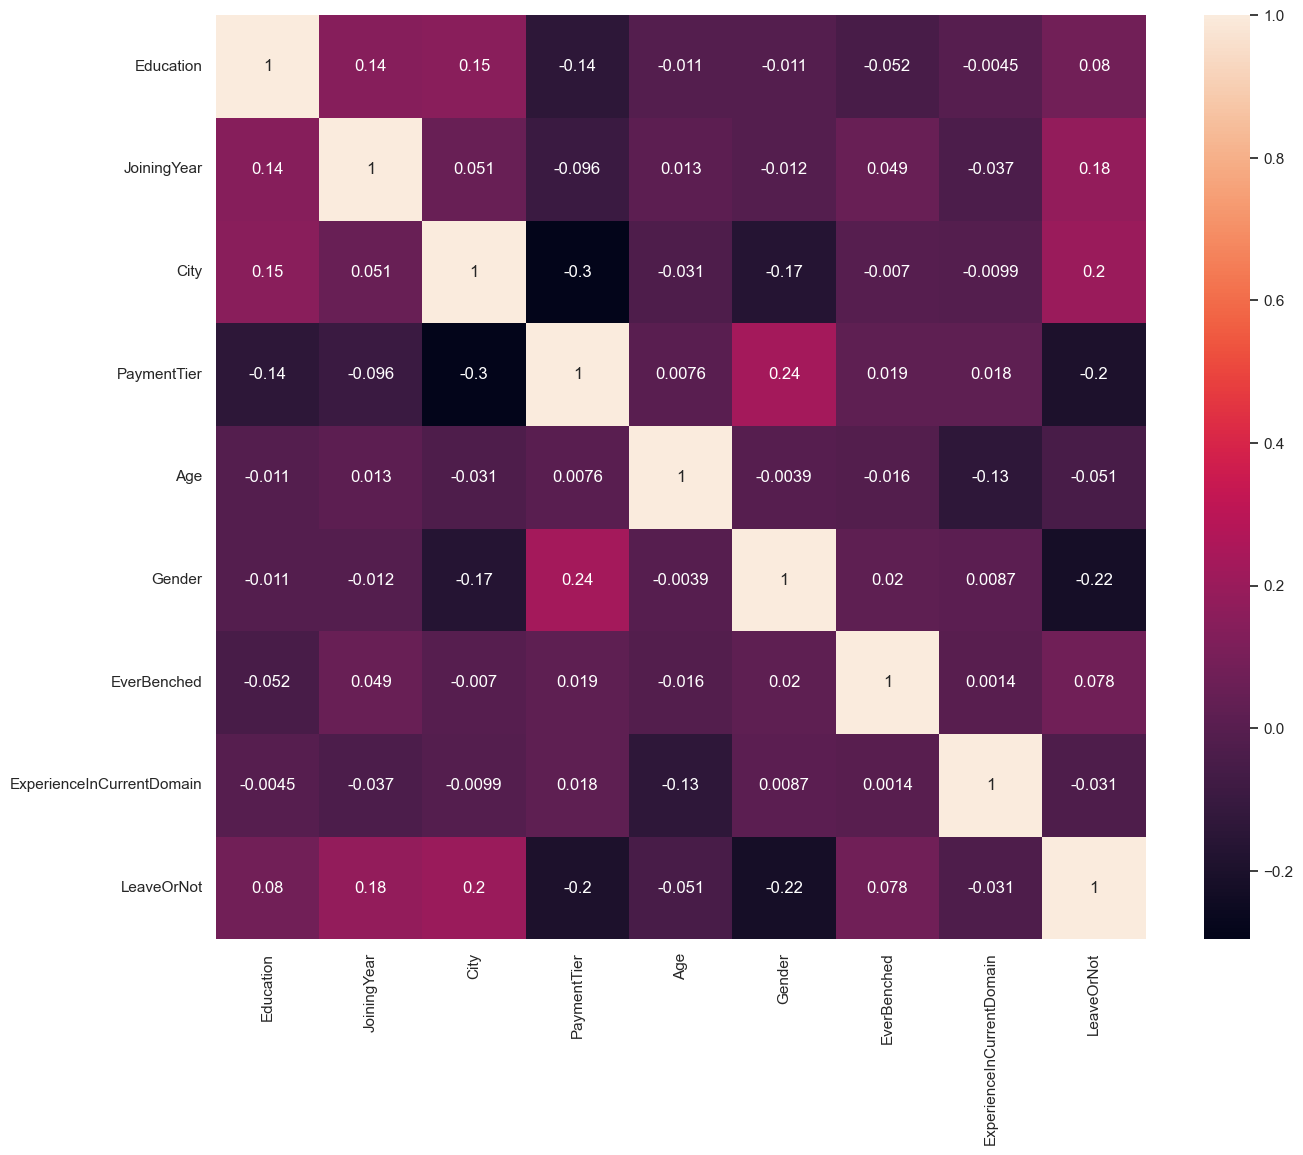

In [35]:
#Correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [36]:
#Train Test Split
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [37]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [38]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

#Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}


In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_leaf=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [40]:
y_pred = dtree.predict(X_test)
print("Accuracy Score : ", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score :  85.18 %


In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8517722878625135
Precision Score :  0.8517722878625135
Recall Score :  0.8517722878625135
Jaccard Score :  0.7418147801683816
Log Loss :  5.342668278945401


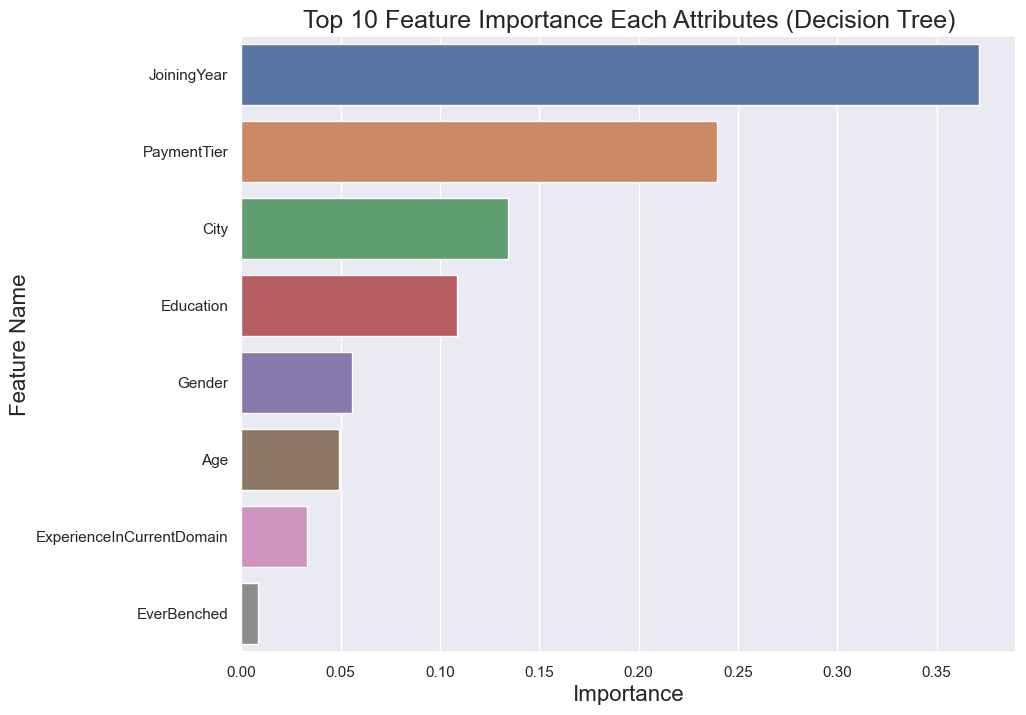

In [42]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [45]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [46]:
#compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8517722878625135')

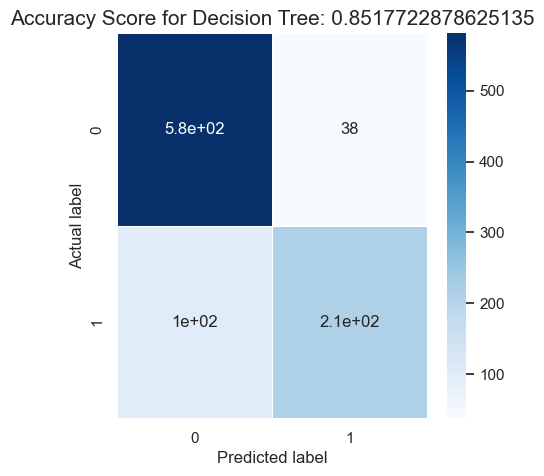

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=.5, annot=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0,42]
}

#Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, class_weight='balanced', max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [50]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 83.67 %


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8367346938775511
Precision Score :  0.8367346938775511
Recall Score :  0.8367346938775511
Jaccard Score :  0.7192982456140351
Log Loss :  5.8846781043456575


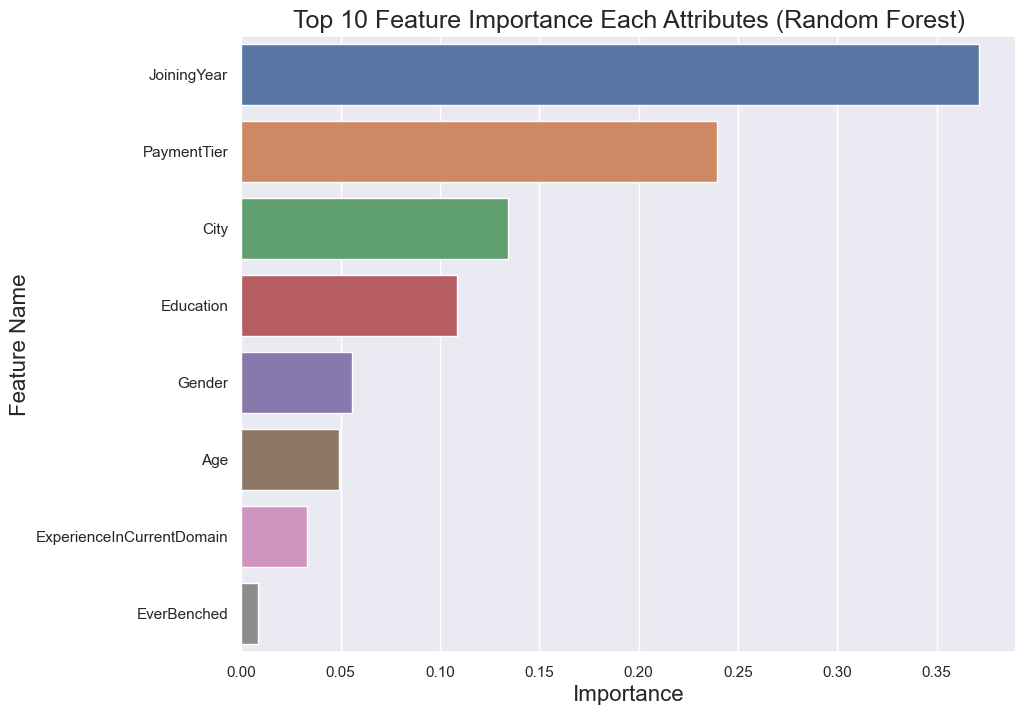

In [52]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [53]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8367346938775511')

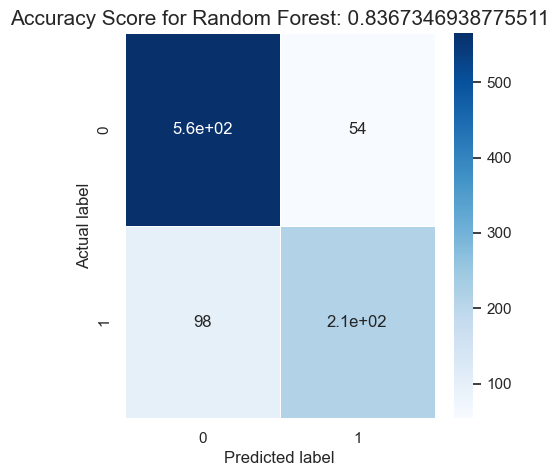

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=.5, annot=True, cmap= 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}' .format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size=15)